In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))###

Using TensorFlow backend.


In [2]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
##model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 21,138,243
Trainable params: 21,138,243
Non-trainable params: 0
_________________________________________________________________


In [3]:
###
import numpy as np
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
X=np.load("X_train.npy")
y=np.load("Y_train.npy")
x_test=np.load("X_test.npy")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape,
X_test.shape,
X.shape)
###
print(y_train.shape,
y_test.shape,
y.shape)
'''
X_train=X
y_train=y
'''
x_test=np.load("X_test.npy")
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y = to_categorical(y)

(10818, 224, 224, 3) (3606, 224, 224, 3) (14424, 224, 224, 3)
(10818,) (3606,) (14424,)


In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.callbacks import CSVLogger

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=50)

validation_generator = validation_datagen.flow(X_test, y_test, batch_size=50)


model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

#for history recovery
csv_logger = CSVLogger('training.log', separator=',', append=False)

history = model.fit_generator(
      train_generator,
      callbacks=[csv_logger],
      steps_per_epoch=216,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=72)

Epoch 1/20
216/216 [==============================] - 221s 1s/step - loss: 0.5385 - acc: 0.7698 - val_loss: 0.5642 - val_acc: 0.7442
Epoch 2/20
216/216 [==============================] - 218s 1s/step - loss: 0.3937 - acc: 0.8454 - val_loss: 0.3835 - val_acc: 0.8566
Epoch 3/20
216/216 [==============================] - 215s 994ms/step - loss: 0.3543 - acc: 0.8604 - val_loss: 0.2879 - val_acc: 0.8819
Epoch 4/20
216/216 [==============================] - 215s 994ms/step - loss: 0.3236 - acc: 0.8742 - val_loss: 0.3524 - val_acc: 0.8678
Epoch 5/20
216/216 [==============================] - 215s 993ms/step - loss: 0.3082 - acc: 0.8811 - val_loss: 0.4138 - val_acc: 0.8718
Epoch 6/20
216/216 [==============================] - 215s 993ms/step - loss: 0.2910 - acc: 0.8863 - val_loss: 0.2810 - val_acc: 0.8915
Epoch 7/20
216/216 [==============================] - 215s 993ms/step - loss: 0.2835 - acc: 0.8912 - val_loss: 0.2776 - val_acc: 0.8982
Epoch 8/20
216/216 [==============================] - 

In [5]:
x_test=np.load("X_test.npy")
x_test = x_test.astype('float32') / 255
yfit = model.predict_classes(x_test)
#print(yfit.shape)
for i in range(len(yfit)):
    print(yfit[i])


2
2
0
2
0
1
0
2
1
1
0
2
2
2
2
0
2
2
0
1
1
2
1
1
1
1
0
2
0
1
1
1
1
2
0
0
1
1
0
1
0
2
1
1
2
2
2
2
1
2
1
0
2
2
2
1
0
2
2
2
1
2
1
0
2
2
0
0
0
2
1
0
2
1
1
2
0
1
0
1
0
2
1
2
0
2
0
2
2
0
1
1
0
0
0
2
1
0
2
2
1
2
0
1
0
1
2
2
1
1
0
2
2
1
2
1
1
2
1
1
2
2
2
1
1
0
1
2
2
1
1
1
2
0
2
2
2
0
0
1
1
1
2
0
1
0
0
1
0
0
0
0
0
1
0
1
1
1
1
2
1
2
2
2
0
2
2
1
0
0
1
2
1
1
0
1
0
2
2
0
0
0
0
2
0
0
2
1
2
2
0
2
0
1
0
2
2
0
2
1
2
1
2
2
0
1
2
1
0
0
1
2
0
1
2
1
1
0
1
0
2
1
1
0
1
0
0
0
0
1
0
0
1
2
1
0
1
1
0
1
0
0
1
1
1
2
2
0
2
0
2
0
0
2
0
0
0
2
1
0
2
2
0
0
2
0
0
2
1
0
1
0
1
1
0
1
2
0
2
0
0
1
2
1
1
2
0
0
0
2
2
2
1
1
0
1
0
0
2
2
0
1
2
0
0
1
2
0
0
2
1
0
1
1
1
2
2
0
0
1
0
1
1
1
0
1
1
1
1
1
0
2
0
0
2
0
2
2
2
2
0
2
0
1
0
1
0
0
2
0
2
2
0
1
0
0
1
2
2
0
0
1
0
1
1
0
0
1
0
0
2
1
1
2
2
0
1
2
0
1
2
2
0
0
0
2
2
2
1
0
1
2
1
2
0
0
2
1
2
2
0
1
1
2
2
2
1
0
1
2
0
1
0
1
0
2
2
2
2
2
1
1
2
0
1
2
1
1
2
1
1
0
0
2
2
2
2
1
2
2
2
0
0
2
1
2
1
1
0
0
0
2
2
0
0
1
0
2
0
0
1
2
0
1
1
0
2
1
1
0
0
2
1
2
2
0
2
1
0
2
2
1
2
0
0
2
2
1
0
0
2
0
0
2
0
1
0
0
1
2


In [6]:
model.save('cnn_copy2_D256_heavy.h5')

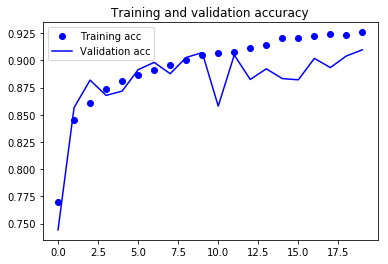

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig = plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


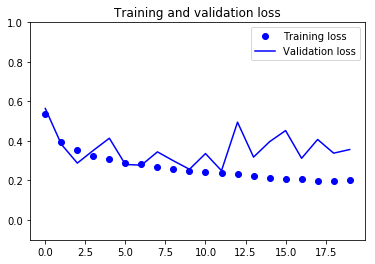

In [10]:
fig = plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylim([-0.1,1])
plt.legend()

In [12]:
x_test


array([[[[0.99215686, 1.        , 0.95686275],
         [0.99215686, 1.        , 0.95686275],
         [0.99215686, 1.        , 0.95686275],
         ...,
         [0.95686275, 0.9764706 , 0.9490196 ],
         [0.9411765 , 0.9764706 , 0.9529412 ],
         [1.        , 0.9882353 , 0.9254902 ]],

        [[0.99215686, 1.        , 0.95686275],
         [0.99215686, 1.        , 0.95686275],
         [0.99215686, 1.        , 0.95686275],
         ...,
         [0.98039216, 1.        , 0.95686275],
         [0.9647059 , 0.99215686, 0.9607843 ],
         [1.        , 0.9882353 , 0.9254902 ]],

        [[0.99215686, 1.        , 0.95686275],
         [0.99215686, 1.        , 0.95686275],
         [0.99215686, 1.        , 0.95686275],
         ...,
         [0.9764706 , 0.98039216, 0.93333334],
         [0.972549  , 0.99215686, 0.9490196 ],
         [1.        , 0.9882353 , 0.9254902 ]],

        ...,

        [[0.92941177, 0.8862745 , 0.8352941 ],
         [0.16862746, 0.14117648, 0.10196079]